# STA365 Applied Bayesian Statistics Homework 1
Talia Fabregas \\
January 15, 2024

---

## Question 1
What proportion of students who answer this question quickly will pass the class? Assume the probability of passing the class is 0.9. Assume the probability of answering this question quickly is 0.6 if you'll pass the class, while the probability drops to 0.3 if you'll not pass the class.

Let $P \in \{0, 1\}$ be the random variable pass, which represents the probability a student will pass the course. \\
Let $Q \in \{0, 1\}$ be the random variable quick which represents the probability that a student can answer this question quickly. \\

The following probabilities are provided: \\
$Pr(P = 1) = 0.9$ \\
$Pr(Q = 1| P = 1) = 0.6$ \\
$Pr(Q = 1|P = 0) = 0.3$ \\

**Question 1 Solution:**
\begin{align*}
Pr(Q = 1) &= Pr(Q = 1|P = 1) \times Pr(P = 1) + Pr(Q|P=0) \times Pr(P = 0) \\
& = 0.6 \times 0.9 + 0.3 \times 0.1 \\
&= 0.57 \\
\\
Pr(P =1 | Q = 1) &= \frac{Pr(Q = 1|P = 1) \times Pr(P=1)}{Pr(Q=1)} \\
&= \frac{0.6 \times 0.9}{0.57} \\
&= 0.9474
\end{align*}

The proportion of students who answer this question quickly that will pass the class is 0.9474


## Question 2
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

**Question 2 Solution:**
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\end{align*}

\begin{align*}
\text{Likelihood} \\
p(x|\theta,n) &=
\end{align*}
## Question 3
Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.

See below for my **Question 3 solution**

In [89]:
# load necessary packages
# !pip install python-ternary
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import stats
import plotly.figure_factory as ff

### Create a sample from a 3-category multinomial distribution and visualize the multinomial distribution & the multinomial sample

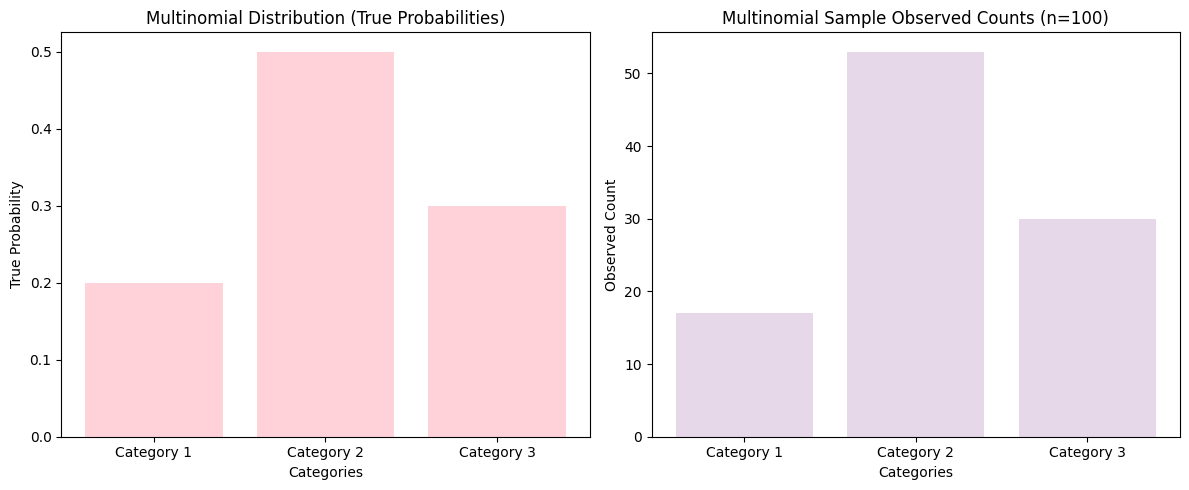

In [73]:
# Create a sample from a 3-category multinomial distribution
random.seed(365)
n = 100
categories = ["Category 1", "Category 2", "Category 3"]
true_probabilities = np.array([0.2, 0.5, 0.3])
multinomial_sample = stats.multinomial.rvs(n=n, p=true_probabilities, size=1)[0]

plt.figure(figsize=(12, 5))

# Multinomial distribution plot
plt.subplot(1, 2, 1)
plt.bar(categories, true_probabilities, color='pink', alpha=0.7)
plt.title("Multinomial Distribution (True Probabilities)")
plt.ylabel("True Probability")
plt.xlabel("Categories")

# Multinomial sample plot
plt.subplot(1, 2, 2)
plt.bar(categories, multinomial_sample, color='#DCC6E0', alpha=0.7)
plt.title(f"Multinomial Sample Observed Counts (n={n})")
plt.ylabel("Observed Count")
plt.xlabel("Categories")

# Display the plots
plt.tight_layout()
plt.show()

### Simplex dirichlet distribution of the prior and posterior using a ternary plot

In [83]:
n_pts = 100
p1 = np.linspace(0,1,100)
p2 = 1-p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p3 = 1-p1-p2
p = np.c_[p1,p2,p3]

# prior
alpha_prior = np.array([1.1, 1.1, 1.1])
# alpha_prior = np.array([2,2,2])
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)

# posteriors
alpha_posterior = alpha_prior + multinomial_sample
dirichlet_posterior = stats.dirichlet(alpha=alpha_posterior)
# dirichlet_posterior_densities = dirichlet_posterior.pdf(p.T)

In [91]:
fig1 = ff.create_ternary_contour(
    p.T,
    dirichlet_prior.pdf(p.T),
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
    )
fig1.update_layout(title='Prior Dirichlet Distribution')

In [90]:
fig2 = ff.create_ternary_contour(
    p.T,
    dirichlet_posterior.pdf(p.T),
    pole_labels=['p1', 'p2', 'p3'],
    interp_mode='cartesian',
    showscale=True
    )
fig2.update_layout(title='Posterior Dirichlet Distribution')

# Rough work cell

In [88]:
# Question 3 code
!pip install -U kaleido
import kaleido
import numpy as np
from scipy import stats
import plotly.figure_factory as ff
import numpy as np

p1p2p3_scatter = stats.dirichlet(alpha=np.array([1.0, 1.0, 1.0])).rvs(size=100)
p1 = np.linspace(0,1,100)
p2 = 1-p1.copy()
p_ = np.linspace(0,1,100)
p1 = (p1[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p2 = (p2[np.newaxis,:]*p_[:,np.newaxis]).flatten()
p3 = 1-p1-p2
p = np.c_[p1,p2,p3]

alpha_prior = np.array([1.1, 1.1, 1.1])  # Prior alpha values
dirichlet_prior = stats.dirichlet(alpha=alpha_prior)
dirichlet_prior_densities = dirichlet_prior.pdf(p.T)

# https://plotly.com/python/ternary-contour/
fig = ff.create_ternary_contour(p.T, dirichlet_prior.pdf(p.T),
                                pole_labels=['p1', 'p2', 'p3'],
                                interp_mode='cartesian',
                                showscale=True)
fig.show('png')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
